Life Expectancy based on BMI

In [1]:
import pandas as pd

#read csv file
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
bmi_life_data.shape
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [30]:
# Split data to train and test set before training and checking score
from sklearn.model_selection import train_test_split

X = bmi_life_data[['BMI']]
y = bmi_life_data[['Life expectancy']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


(163, 1)

In [3]:
#Build linear regression model and fit model to data

from sklearn.linear_model import LinearRegression
bmi_life_model = LinearRegression()
bmi_life_model.fit(X_train, y_train)

LinearRegression()

In [4]:
bmi_life_model.score(X_train, y_train)

0.4173568685709028

In [5]:
bmi_life_model.score(X_test, y_test)

0.46728770095853855

In [39]:
#Predict
laos_life_exp = bmi_life_model.predict([[21.07931]])
print(laos_life_exp)

[[61.41748108]]


In [11]:
#Use a lasso L1 model instead and check the score 

from sklearn import linear_model
lasso_reg_model = linear_model.Lasso(alpha=.05, max_iter=100)
lasso_reg_model.fit(X_train, y_train)

lasso_reg_model.score(X_train, y_train)

0.4173509629283765

In [7]:
# check the score on unseen test using lasso model
lasso_reg_model.score(X_test, y_test)

0.46722231289182037

In [8]:
#Use a Ridge L2 model instead and test the accuracy 

from sklearn.linear_model import Ridge
ridge_reg_model = Ridge(alpha=0.1)
ridge_reg_model.fit(X_train, y_train)

ridge_reg_model.score(X_train, y_train)

0.4173568580577417

In [9]:
# check the score on unseen test using Ridge model
ridge_reg_model.score(X_test, y_test)

0.46726012335973366

<AxesSubplot:xlabel='BMI', ylabel='Life expectancy'>

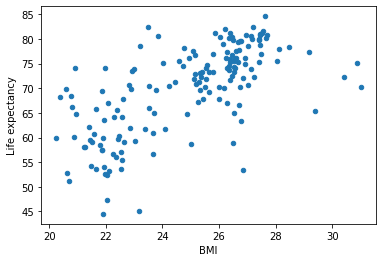

In [34]:
import matplotlib.pyplot as plt
bmi_life_data.plot.scatter(x='BMI', y='Life expectancy')


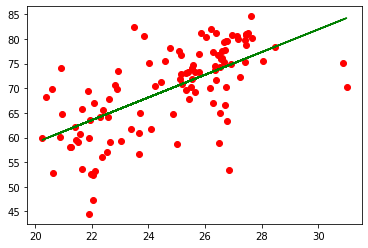

In [37]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, bmi_life_model.predict(X_train), color = "green")